<a href="https://colab.research.google.com/github/jg116907/Time-Series-Analysis-study/blob/master/Trend_and_seasonality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비정상 확률 과정(non-stationary process)

In [0]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = sm.datasets.get_rdataset("CanPop",package="carData").data

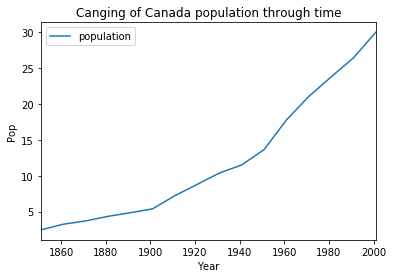

In [9]:
df.plot(x="year", y="population")
plt.xlabel("Year")
plt.ylabel("Pop")
plt.title("Canging of Canada population through time")
plt.show()

In [0]:
import scipy as sp

In [0]:
N = 500
t1 = 100
t2 = 400
t = np.arange(N)

np.random.seed(12)
y1 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)),0,0)

In [0]:
np.random.seed(18)
y2 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)),0,0)
np.random.seed(22)
y3 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)),0,0)
np.random.seed(24)
y4 = np.insert(np.cumsum(sp.stats.norm.rvs(size=N-1)),0,0)

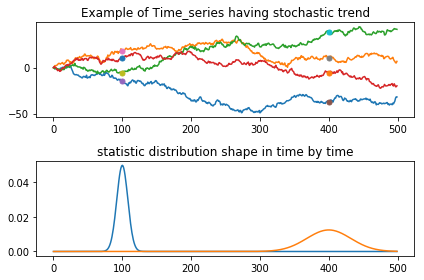

In [15]:
plt.subplot(211)
plt.title("Example of Time_series having stochastic trend")
plt.plot(t,y1)
plt.plot(t,y2)
plt.plot(t,y3)
plt.plot(t,y4)
plt.plot(t1, y1[t1], 'o', markersize=5)
plt.plot(t2, y1[t2], 'o', markersize=5)
plt.plot(t1, y2[t1], 'o', markersize=5)
plt.plot(t2, y2[t2], 'o', markersize=5)
plt.plot(t1, y3[t1], 'o', markersize=5)
plt.plot(t2, y3[t2], 'o', markersize=5)
plt.plot(t1, y4[t1], 'o', markersize=5)
plt.plot(t2, y4[t2], 'o', markersize=5)

plt.subplot(212)
plt.grid(False)
plt.title("statistic distribution shape in time by time")
plt.plot(t,sp.stats.norm(t1,0.08*t1).pdf(t))
plt.plot(t,sp.stats.norm(t2,0.08*t2).pdf(t))

plt.tight_layout()
plt.show() # 분산이 점차 커지는 데이터

In [16]:
data = sm.datasets.get_rdataset("Titanic", package="datasets")

df = data.data
df.tail()

,Class,Sex,Age,Survived,Freq
27,Crew,Male,Adult,Yes,192
28,1st,Female,Adult,Yes,140
29,2nd,Female,Adult,Yes,80
30,3rd,Female,Adult,Yes,76
31,Crew,Female,Adult,Yes,20


In [17]:
data = sm.datasets.get_rdataset("deaths","MASS")

df = data.data
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [0]:
def yearfraction2datetime(yearfraction, startyear=0):
  import datetime
  import dateutil
  year = int(yearfraction) + startyear
  month = int(round(12*(yearfraction - year)))
  delta = dateutil.relativedelta.relativedelta(months=month)
  date = datetime.datetime(year,1,1) + delta
  return date

In [24]:
df['datetime'] = df.time.map(yearfraction2datetime)
df.tail()

,time,value,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


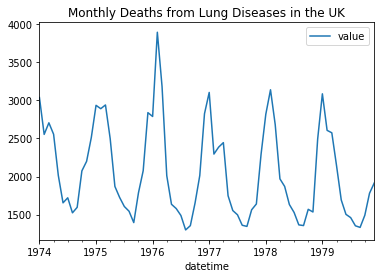

In [25]:
df.plot(x="datetime", y="value")
plt.title(data.title)
plt.show()

---
# 로그 변환

In [0]:
data = sm.datasets.get_rdataset("AirPassengers")
df = data.data

In [0]:
df["datetime"] = df.time.map(yearfraction2datetime)

In [30]:
df.head(3)

,time,value,datetime
0,1949.000000,112,1949-01-01
1,1949.083333,118,1949-02-01
2,1949.166667,132,1949-03-01


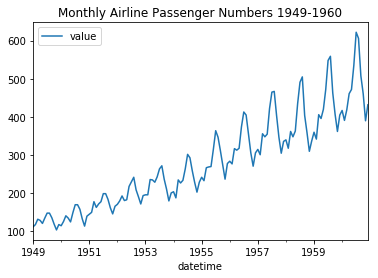

In [31]:
df.plot(x="datetime", y="value")
plt.title(data.title)
plt.show()

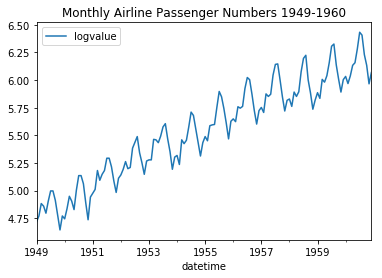

In [32]:
# 로그 변환
df["logvalue"] = np.log(df.value)
df.plot(x = "datetime", y="logvalue")
plt.title(data.title)
plt.show() # 선형 추세는 가지고 있지만 분산의 크기가 일정하게 변환

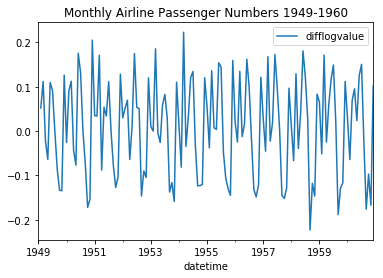

In [33]:
df["difflogvalue"] = df.logvalue.diff()
df.plot(x="datetime",y="difflogvalue")
plt.title(data.title)
plt.show() # 선형 추세를 없애기 위해 시계열을 차분

---
# Box-Cox 변환
- 정규분포가 아닌 자료를 정규분포로 변환하기 위해 사용


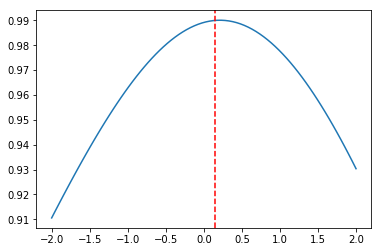

In [35]:
x,y = sp.stats.boxcox_normplot(df.value,-2,2)
plt.plot(x,y)
y2, l = sp.stats.boxcox(df.value)
plt.axvline(x=l,color='r',ls='--')
plt.show()

In [36]:
print("optimal lambda : ", l) # 최적의 lambda 값

optimal lambda :  0.14802265137037945


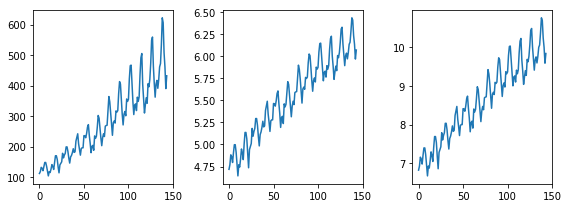

In [37]:
plt.figure(figsize=(8,3))

plt.subplot(131)
plt.plot(df.value)

plt.subplot(132)
plt.plot(np.log(df.value))

plt.subplot(133)
plt.plot(y2)

plt.tight_layout()
plt.show()

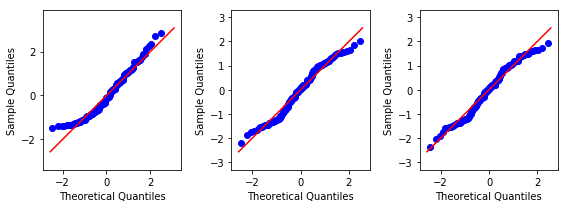

In [38]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(131)
sm.qqplot(df.value, fit=True, line='45', ax=ax1)
plt.axis("equal")

ax2 = plt.subplot(132);
sm.qqplot(np.diff(np.log(df.value)), fit=True, line='45', ax=ax2)
plt.axis("equal")

ax3 = plt.subplot(133);
sm.qqplot(np.diff(y2), fit=True, line='45', ax=ax3)
plt.axis("equal")

plt.tight_layout()
plt.show()